# Chapter 11 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import mlba
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
example_df = mlba.load_data('TinyData.csv')

predictors = ['Fat', 'Salt']
outcome = 'Acceptance'

X = example_df[predictors]
y = example_df[outcome]
classes = sorted(y.unique())

clf = MLPClassifier(hidden_layer_sizes=[3], activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
print(pd.concat([
    example_df,
    pd.DataFrame(clf.predict_proba(X), columns=classes),
], axis=1))

Intercepts
[array([0.13368043, 4.0724755 , 7.00768105]), array([14.30748673])]
Weights
[array([[ -1.30656481,  -4.20427795, -13.29587332],
       [ -0.04399728,  -4.91606922,  -6.03356987]]), array([[ -0.27348313],
       [ -9.01211574],
       [-17.63504688]])]
   Obs.  Fat  Salt Acceptance   dislike      like
0     1  0.2   0.9       like  0.000490  0.999510
1     2  0.1   0.1    dislike  0.999994  0.000006
2     3  0.2   0.4    dislike  0.999741  0.000259
3     4  0.2   0.5    dislike  0.997368  0.002632
4     5  0.4   0.5       like  0.002133  0.997867
5     6  0.3   0.8       like  0.000075  0.999925


In [4]:
import numpy as np
print(f'{clf.intercepts_[0][0]=}')
print(f'{clf.coefs_[0][0:1]=}')
output_N3 = 1/(1+np.exp(-(clf.intercepts_[0][0] + clf.coefs_[0][0][0]*0.2
                                                + clf.coefs_[0][1][0]*(0.9))))
output_N4 = 1/(1+np.exp(-(clf.intercepts_[0][1] + clf.coefs_[0][0][1]*0.2
                                                + clf.coefs_[0][1][1]*(0.9))))
output_N5 = 1/(1+np.exp(-(clf.intercepts_[0][2] + clf.coefs_[0][0][2]*0.2
                                                + clf.coefs_[0][1][2]*(0.9))))
print(f'{output_N3=:.3f}')
print(f'{output_N4=:.3f}')
print(f'{output_N5=:.3f}')
output_N6 = 1/(1+np.exp(-(clf.intercepts_[1][0] + clf.coefs_[1][0][0]*output_N3
                                                + clf.coefs_[1][1][0]*output_N4
                                                + clf.coefs_[1][2][0]*output_N5)))
print(f'{output_N6=:.4f}')

clf.intercepts_[0][0]=0.13368043174991306
clf.coefs_[0][0:1]=array([[ -1.30656481,  -4.20427795, -13.29587332]])
output_N3=0.458
output_N4=0.233
output_N5=0.253
output_N6=0.9995


In [5]:
mlba.classificationSummary(y_true=y, y_pred=clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 1.0000)

        Prediction
 Actual dislike    like
dislike       3       0
   like       0       3


In [6]:
accidents_df = mlba.load_data('accidentsnn.csv')
input_vars = ['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL']

accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')

# convert the categorical data into dummy variables
# exclude the column for SUR_COND 9 = unknown
processed = pd.get_dummies(accidents_df, columns=['SUR_COND'])
processed = processed.drop(columns=['SUR_COND_9'])

outcome = 'MAX_SEV_IR'
predictors = [c for c in processed.columns if c != outcome]

# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y.values)

# training performance (use idxmax to revert the one-hot encoding)
mlba.classificationSummary(y_true=train_y, y_pred=clf.predict(train_X))

# validation performance
mlba.classificationSummary(y_true=valid_y, y_pred=clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8664)

       Prediction
Actual   0   1   2
     0 331   0   1
     1   0 180   0
     2  30  49   8
Confusion Matrix (Accuracy 0.8550)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 119   0
     2  24  33   5


 Fitting class probabilities separately

In [7]:
accidents_df = mlba.load_data('accidentsnn.csv')
input_vars = ['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL']

accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')

# convert the categorical data into dummy variables
processed = pd.get_dummies(accidents_df)
# drop the column for SUR_COND 9 = unknown
processed = processed.drop(columns=['SUR_COND_9'])

outcome = ['MAX_SEV_IR_0', 'MAX_SEV_IR_1', 'MAX_SEV_IR_2']
predictors = [c for c in processed.columns if c not in outcome]
classes = sorted(outcome)

# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y)

# training performance (use idxmax to revert the one-hot encoding)
trainPrediction = pd.DataFrame(clf.predict(train_X), columns=outcome).idxmax(axis=1)
mlba.classificationSummary(y_true=train_y.idxmax(axis=1), y_pred=trainPrediction, class_names=classes)

# validation performance
validPrediction = pd.DataFrame(clf.predict(valid_X), columns=outcome).idxmax(axis=1)
mlba.classificationSummary(y_true=valid_y.idxmax(axis=1), y_pred=validPrediction, class_names=classes)

Confusion Matrix (Accuracy 0.8731)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          332            0            0
MAX_SEV_IR_1            0          170           10
MAX_SEV_IR_2           31           35           21
Confusion Matrix (Accuracy 0.8675)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          218            0            1
MAX_SEV_IR_1            0          113            6
MAX_SEV_IR_2           24           22           16


 Grid search

In [8]:
from sklearn.model_selection import GridSearchCV

# train neural network using grid search for hyperparameter tuning
clf = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y.values)

param_grid = {
    'hidden_layer_sizes': [[1], [2], [3], [4], [5]],
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                        param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8630672268907563
Best parameters:  {'hidden_layer_sizes': [4]}


In [9]:
selected = ['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[selected])

  param_hidden_layer_sizes  mean_test_score  std_test_score
0                      [1]         0.844762        0.011030
1                      [2]         0.848067        0.009913
2                      [3]         0.859734        0.025691
3                      [4]         0.863067        0.024167
4                      [5]         0.856415        0.020770


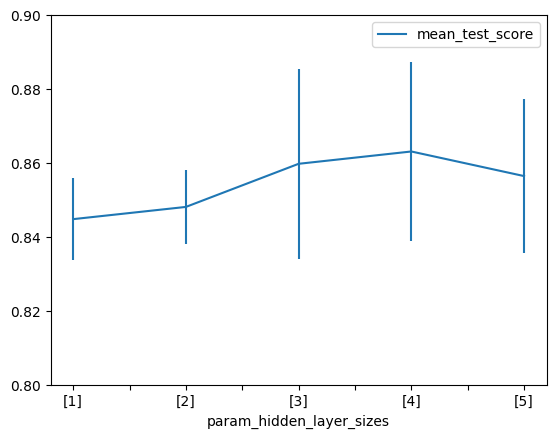

In [10]:
import matplotlib.pyplot as plt
pd.DataFrame(gridSearch.cv_results_).plot(
    x='param_hidden_layer_sizes',
    y='mean_test_score', yerr='std_test_score', ylim=(0.8, 0.9))
plt.show()
%matplotlib inline

In [11]:
import keras
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# pixel values need to be scaled to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# input require an additional dimension to describe pixel values
# dimensions are (samples, row, column, pixel)
train_images = train_images.reshape(*train_images.shape, 1)
test_images = test_images.reshape(*test_images.shape, 1)

# output values need to be converted into a matrix with one-hot encoding of classes
# dimensions are (samples, classes)
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels_ohe = keras.utils.to_categorical(test_labels, 10)

In [12]:
input_shape = train_images.shape[1:]
num_classes = 10

model = keras.Sequential([
    keras.Input(input_shape),
    keras.layers.Conv2D(32, (5, 5), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,978 (3.86 MB)

 Trainable params: 1,011,978 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# keep a copy of the defined model to train with fewer epochs
model_cloned = keras.models.clone_model(model)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=256, epochs=50,
          validation_data=(test_images, test_labels_ohe), verbose=2)

Epoch 1/50
235/235 - 15s - 65ms/step - accuracy: 0.7909 - loss: 0.5926 - val_accuracy: 0.8554 - val_loss: 0.3937
Epoch 2/50
235/235 - 15s - 63ms/step - accuracy: 0.8669 - loss: 0.3793 - val_accuracy: 0.8829 - val_loss: 0.3163
Epoch 3/50
235/235 - 15s - 62ms/step - accuracy: 0.8812 - loss: 0.3273 - val_accuracy: 0.8968 - val_loss: 0.2883
Epoch 4/50
235/235 - 15s - 64ms/step - accuracy: 0.8928 - loss: 0.2945 - val_accuracy: 0.8985 - val_loss: 0.2720
Epoch 5/50
235/235 - 19s - 80ms/step - accuracy: 0.9012 - loss: 0.2711 - val_accuracy: 0.9054 - val_loss: 0.2606
Epoch 6/50
235/235 - 20s - 84ms/step - accuracy: 0.9074 - loss: 0.2530 - val_accuracy: 0.9073 - val_loss: 0.2467
Epoch 7/50
235/235 - 19s - 81ms/step - accuracy: 0.9147 - loss: 0.2353 - val_accuracy: 0.9126 - val_loss: 0.2401
Epoch 8/50
235/235 - 18s - 77ms/step - accuracy: 0.9177 - loss: 0.2207 - val_accuracy: 0.9132 - val_loss: 0.2398
Epoch 9/50
235/235 - 17s - 72ms/step - accuracy: 0.9232 - loss: 0.2082 - val_accuracy: 0.9110 - 

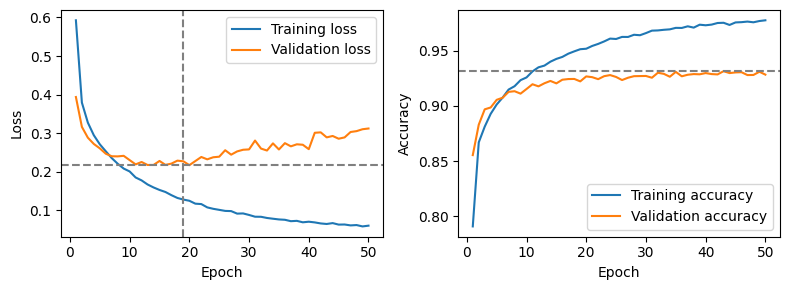

In [15]:
def plotMetrics(metrics, ax, ycolumns, legend, ylabel):
    if ylabel == 'Loss':
        best_val_epoch = metrics[ycolumns[1]].argmin()
    else:
        best_val_epoch = metrics[ycolumns[1]].argmax()
    best_val_metric = metrics[ycolumns[1]][best_val_epoch]

    ax = metrics.plot(x='Epoch', y=ycolumns, ax=ax)
    ax.axhline(best_val_metric, linestyle='--', color='grey')
    if ylabel == 'Loss':
        ax.axvline(best_val_epoch, linestyle='--', color='grey')
    ax.legend(legend)
    ax.set_ylabel(ylabel)

metrics = pd.DataFrame(history.history)
metrics['Epoch'] = [e + 1 for e in history.epoch]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
plotMetrics(metrics, axes[0], ['loss', 'val_loss'],
            ['Training loss', 'Validation loss'], 'Loss')
plotMetrics(metrics, axes[1], ['accuracy', 'val_accuracy'],
            ['Training accuracy', 'Validation accuracy'], 'Accuracy')
plt.tight_layout()
plt.show()

Epoch 1/20
235/235 - 16s - 67ms/step - accuracy: 0.7798 - loss: 0.6167 - val_accuracy: 0.8603 - val_loss: 0.3838
Epoch 2/20
235/235 - 15s - 65ms/step - accuracy: 0.8594 - loss: 0.3940 - val_accuracy: 0.8822 - val_loss: 0.3283
Epoch 3/20
235/235 - 15s - 64ms/step - accuracy: 0.8789 - loss: 0.3411 - val_accuracy: 0.8892 - val_loss: 0.2985
Epoch 4/20
235/235 - 15s - 65ms/step - accuracy: 0.8881 - loss: 0.3093 - val_accuracy: 0.8973 - val_loss: 0.2807
Epoch 5/20
235/235 - 15s - 64ms/step - accuracy: 0.8973 - loss: 0.2838 - val_accuracy: 0.9055 - val_loss: 0.2585
Epoch 6/20
235/235 - 15s - 64ms/step - accuracy: 0.9029 - loss: 0.2675 - val_accuracy: 0.9069 - val_loss: 0.2550
Epoch 7/20
235/235 - 15s - 65ms/step - accuracy: 0.9085 - loss: 0.2497 - val_accuracy: 0.9087 - val_loss: 0.2457
Epoch 8/20
235/235 - 15s - 65ms/step - accuracy: 0.9131 - loss: 0.2375 - val_accuracy: 0.9118 - val_loss: 0.2372
Epoch 9/20
235/235 - 15s - 64ms/step - accuracy: 0.9180 - loss: 0.2244 - val_accuracy: 0.9107 - 

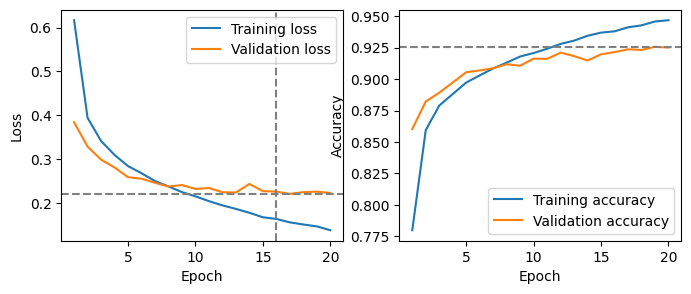

In [16]:
# retrain model for 20 epochs
model = model_cloned
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=256, epochs=20,
        validation_data=(test_images, test_labels_ohe), verbose=2)

metrics = pd.DataFrame(history.history)
metrics['Epoch'] = [e + 1 for e in history.epoch]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
plotMetrics(metrics, axes[0], ['loss', 'val_loss'],
            ['Training loss', 'Validation loss'], 'Loss')
plotMetrics(metrics, axes[1], ['accuracy', 'val_accuracy'],
            ['Training accuracy', 'Validation accuracy'], 'Accuracy')

In [17]:
propensities = model.predict(test_images, verbose=0)
propensities[:5].round(3)

# convert to class using winner takes all
predClass = propensities.argmax(axis=1)
predClass[:5]

# confusion matrix
mlba.classificationSummary(y_true=test_labels, y_pred=predClass)

Confusion Matrix (Accuracy 0.9251)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9
     0 861   0  20  10   3   0  94   0  12   0
     1   2 982   0   9   3   0   2   0   2   0
     2  11   0 884   6  61   0  36   0   2   0
     3  11   2  13 933  17   0  22   0   2   0
     4   2   0  24  27 909   0  37   0   1   0
     5   0   0   0   0   0 988   0   9   0   3
     6  79   0  61  23  69   0 759   0   9   0
     7   0   0   0   0   0   5   0 981   0  14
     8   3   0   1   2   1   2   0   2 989   0
     9   0   0   0   0   0   5   0  30   0 965
